In [7]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import sys
import os

# Ensure you are in the correct directory
os.chdir(r'G:\Programming\10_Academy\solar_radiation_EDA')

# Add the root directory to the Python path
sys.path.append(os.getcwd())
from scripts.analysis_script import *
import scripts.analysis_script as analysis_script

df_benin =pd.read_csv('data/benin-malanville.csv')
df_sierraleone =pd.read_csv('data/sierraleone-bumbuna.csv')
df_togo =pd.read_csv('data/togo-dapaong_qc.csv')
# print(df.head())
#copy of the dataframes
df_benin_cleaned=None
df_sierraleone_cleaned=None
df_togo_cleaned=None

In [9]:
#check missing values in each column
check_missing_value(df_benin)
check_missing_value(df_sierraleone)
check_missing_value(df_togo)

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [11]:
#Replacing negative values in 'GHI', 'DNI', 'DHI' with zero since they are measuremet errors
df_benin_cleaned=replace_nagative_values(df_benin)
df_sierraleone_cleaned=replace_nagative_values(df_sierraleone)
df_togo_cleaned=replace_nagative_values(df_togo)

In [14]:
#replace the outliers of 'ModA', 'ModB','WS', 'WSgust'
df_benin_cleaned=outliers_fun(df_benin_cleaned,['ModA', 'ModB','WS', 'WSgust'])
df_sierraleone_cleaned=outliers_fun(df_sierraleone_cleaned,['ModA', 'ModB','WS', 'WSgust'])
df_togo_cleaned=outliers_fun(df_togo_cleaned,['ModA', 'ModB','WS', 'WSgust'])

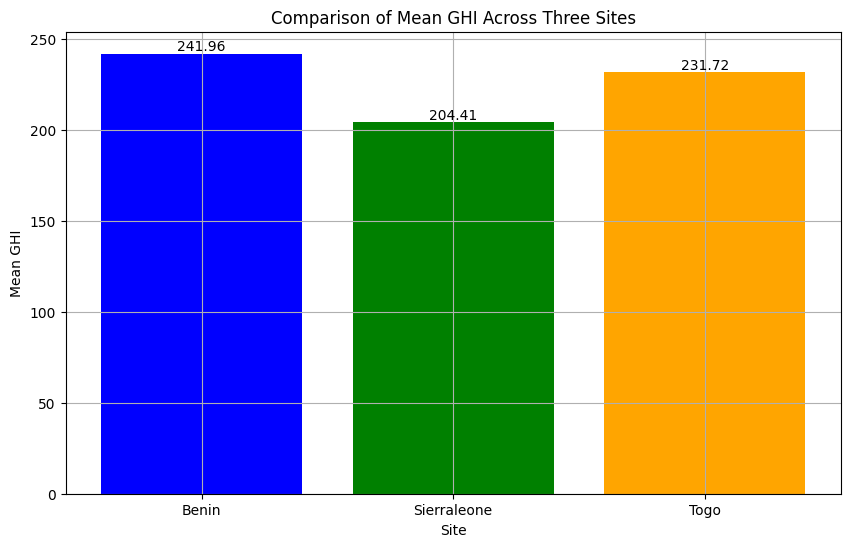

G:\Programming\10_Academy\solar_radiation_EDA\scripts\analysis_script.py:88: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  std_ghi_1 = df1['GHI'].std()


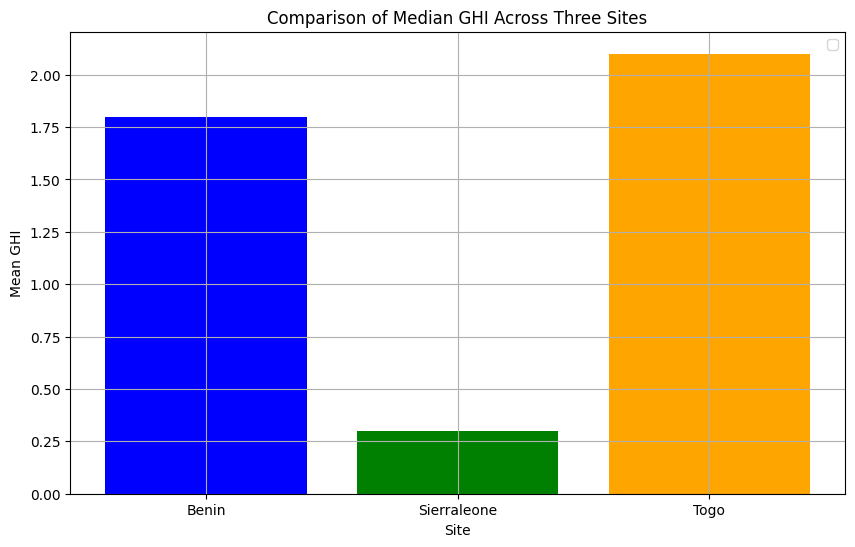

G:\Programming\10_Academy\solar_radiation_EDA\scripts\analysis_script.py:107: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  


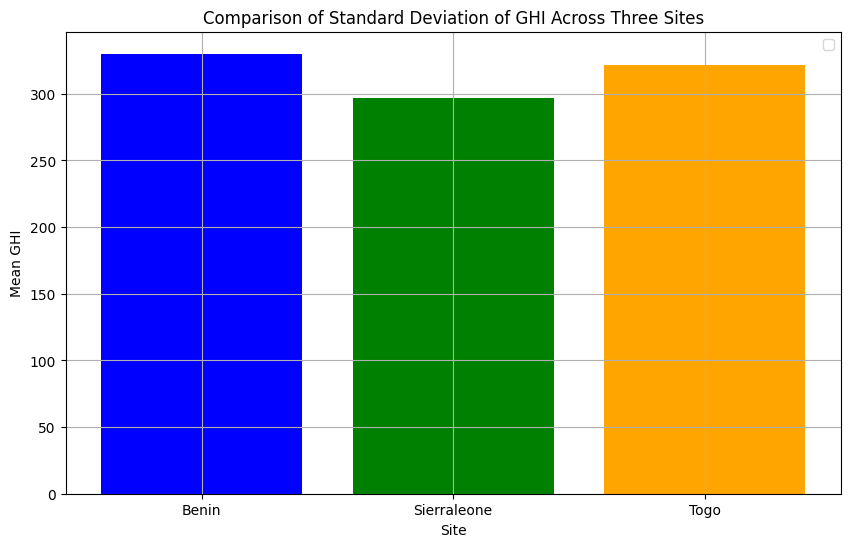

In [19]:
#compare the mean, median and standard deviation of 'GHI', 'DNI', 'DHI' of the sites
mean_median_std_comparison(df_benin_cleaned,df_sierraleone_cleaned,df_togo_cleaned)

In [ ]:
#time series analysis
line_graph_over_a_day(df_benin_cleaned)
line_graph_over_a_day(df_sierraleone_cleaned)
line_graph_over_a_day(df_togo_cleaned)

In [ ]:
line_graph_over_a_month(df_benin_cleaned)
line_graph_over_a_month(df_sierraleone_cleaned)
line_graph_over_a_month(df_togo_cleaned)

In [ ]:
correlation(df_benin_cleaned)